In [19]:
# Import The Libraries
# ! pip install xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import The Dataset
df = pd.read_excel('OnlineRetailDataset.xlsx')
df = df[df['CustomerID'].notna()]
# Sample the dataset
df_fix = df.sample(500, random_state=50)

In [20]:
df_fix.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
350946,567656,21084,SET/6 COLLAGE PAPER CUPS,4,2011-09-21 14:40:00,0.83,14096.0,United Kingdom
324678,565411,85135C,RED DRAGONFLY HELICOPTER,1,2011-09-04 11:22:00,7.95,13772.0,United Kingdom
370553,569140,21485,RETROSPOT HEART HOT WATER BOTTLE,3,2011-09-30 14:59:00,4.95,14503.0,United Kingdom
12134,537369,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,1,2010-12-06 12:41:00,4.25,17860.0,United Kingdom
461522,575944,23486,ANTIQUE HEART SHELF UNIT,2,2011-11-13 11:46:00,16.65,16571.0,United Kingdom


In [21]:
# Convert to show date only
from datetime import datetime
df_fix["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Create TotalSum colummn
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"]

# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12349.0,19,1,19.90
12357.0,33,1,106.20
12378.0,130,1,19.80
12380.0,186,1,14.75
12394.0,217,1,10.00


<BarContainer object of 402 artists>

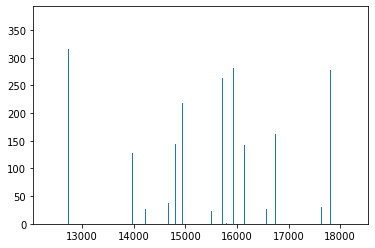

In [24]:
plt.bar(customers, customers["Recency"])